## Goal : Transform the given dataset in the form of input to a Apriori Algorithm
### Converting the data into a sparse matrix of the items purchased at the grocery shop
**_Prepared by Aishwarya G (17BCS050)_**

## Imports

In [1]:
#Dataframe usage
import pandas as pd 

In [2]:
# numerical calculations
import numpy as np

In [3]:
# Bag of words model - sparse matrix creation
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Import Apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [5]:
# plotting 
import matplotlib.pyplot as plt

In [6]:
# regular expressions
import re

## Reading the Original file

In [7]:
# Reading the csv file using pandas
# ignoring the 1st column as it is not desirable
df = pd.read_csv("groceries - groceries.csv").iloc[:,1:]

In [8]:
# displaying the first five rows of the data frame
df.head()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Gathering a basic knowledge about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
Item 1     9835 non-null object
Item 2     7676 non-null object
Item 3     6033 non-null object
Item 4     4734 non-null object
Item 5     3729 non-null object
Item 6     2874 non-null object
Item 7     2229 non-null object
Item 8     1684 non-null object
Item 9     1246 non-null object
Item 10    896 non-null object
Item 11    650 non-null object
Item 12    468 non-null object
Item 13    351 non-null object
Item 14    273 non-null object
Item 15    196 non-null object
Item 16    141 non-null object
Item 17    95 non-null object
Item 18    66 non-null object
Item 19    52 non-null object
Item 20    38 non-null object
Item 21    29 non-null object
Item 22    18 non-null object
Item 23    14 non-null object
Item 24    8 non-null object
Item 25    7 non-null object
Item 26    7 non-null object
Item 27    6 non-null object
Item 28    5 non-null object
Item 29    4 non-null object
Item

In [10]:
# displaying all the columns
df.columns

Index(['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7',
       'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12', 'Item 13',
       'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18', 'Item 19',
       'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24', 'Item 25',
       'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30', 'Item 31',
       'Item 32'],
      dtype='object')

## Subsetting and Preprocessing the dataset

In [11]:
# replacing space with underscore, converting item name to lower, 
#removing punctuation marks, ignoring nan objects
modified_df = list()
for row in df.values.tolist():
    row = [re.sub(pattern="\W+", repl="", 
                  string=str(x).replace(" ", "_").lower()) for x in row if str(x) != 'nan']
    modified_df += [sorted(row)]
modified_df[:10]

[['citrus_fruit', 'margarine', 'ready_soups', 'semifinished_bread'],
 ['coffee', 'tropical_fruit', 'yogurt'],
 ['whole_milk'],
 ['cream_cheese', 'meat_spreads', 'pip_fruit', 'yogurt'],
 ['condensed_milk',
  'long_life_bakery_product',
  'other_vegetables',
  'whole_milk'],
 ['abrasive_cleaner', 'butter', 'rice', 'whole_milk', 'yogurt'],
 ['rollsbuns'],
 ['bottled_beer',
  'liquor_appetizer',
  'other_vegetables',
  'rollsbuns',
  'uhtmilk'],
 ['potted_plants'],
 ['cereals', 'whole_milk']]

In [12]:
# converting it into a DataFrame and displaying
modified_df = pd.DataFrame(modified_df)
print(modified_df.shape)
modified_df.head(10)

(9835, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus_fruit,margarine,ready_soups,semifinished_bread,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,coffee,tropical_fruit,yogurt,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole_milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,cream_cheese,meat_spreads,pip_fruit,yogurt,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,condensed_milk,long_life_bakery_product,other_vegetables,whole_milk,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,abrasive_cleaner,butter,rice,whole_milk,yogurt,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,rollsbuns,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,bottled_beer,liquor_appetizer,other_vegetables,rollsbuns,uhtmilk,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,potted_plants,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,cereals,whole_milk,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [13]:
# Taking a subset of the original file with 50 rows and 5 columns 
modified_df = modified_df.iloc[:50, :5]
# printing the last 5 rows of the data frame
modified_df.tail()

,0,1,2,3,4
45,coffee,None,None,None,None
46,bottled_water,pastry,None,None,None
47,rollsbuns,None,None,None,None
48,misc_beverages,None,None,None,None
49,bottled_water,butter,curd,hard_cheese,long_life_bakery_product


## Taking the individual frequencies of each item 

In [14]:
# Creating a list of all the items in the basket
item_list = list()
for col in modified_df.columns:
    # Preprocessing of the items by ignoring all the "nan" values and replacing space with underscore
    item_list = item_list + [str(x) for x in list(modified_df[col]) if str(x)!='None'] 
item_list = sorted(item_list)
# printing the first 10 items of the list
print(len(item_list))
item_list[:10]

142


['abrasive_cleaner',
 'abrasive_cleaner',
 'artif_sweetener',
 'bathroom_cleaner',
 'beef',
 'beef',
 'berries',
 'berries',
 'beverages',
 'beverages']

In [15]:
# Creating a set of all the unique items in the basket
item_set = frozenset()
for col in modified_df.columns:
        # Preprocessing of the items by ignoring all the "nan" values and replacing space with underscore
    item_set = item_set.union(set([str(x) for x in list(modified_df[col]) if str(x)!='None']))
item_set = sorted(item_set)
# set cannot be hashed, so converting it to a list and
# printing the first 10 items of the list
print(len(item_set))
list(item_set)[:10]

63


['abrasive_cleaner',
 'artif_sweetener',
 'bathroom_cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled_beer',
 'bottled_water',
 'brown_bread',
 'butter']

In [16]:
# printing the counts of each item in the `item_list`
valu_counts = dict()
for x in item_set:
    valu_counts[x] = item_list.count(x)
print(valu_counts)
print(len(valu_counts))

{'abrasive_cleaner': 2, 'artif_sweetener': 1, 'bathroom_cleaner': 1, 'beef': 2, 'berries': 2, 'beverages': 2, 'bottled_beer': 1, 'bottled_water': 8, 'brown_bread': 2, 'butter': 4, 'butter_milk': 2, 'candy': 2, 'canned_beer': 5, 'cereals': 2, 'chicken': 1, 'chocolate': 3, 'citrus_fruit': 3, 'coffee': 3, 'condensed_milk': 1, 'cream_cheese': 3, 'curd': 2, 'dessert': 1, 'detergent': 2, 'dishes': 1, 'domestic_eggs': 1, 'flour': 1, 'frankfurter': 1, 'frozen_dessert': 1, 'fruitvegetable_juice': 4, 'grapes': 1, 'hamburger_meat': 1, 'hard_cheese': 1, 'hygiene_articles': 1, 'liquor_appetizer': 1, 'long_life_bakery_product': 2, 'margarine': 1, 'meat_spreads': 1, 'misc_beverages': 1, 'napkins': 1, 'newspapers': 5, 'other_vegetables': 10, 'packaged_fruitvegetables': 1, 'pastry': 3, 'pip_fruit': 1, 'pork': 1, 'potted_plants': 1, 'processed_cheese': 1, 'ready_soups': 1, 'rice': 1, 'rollsbuns': 7, 'root_vegetables': 2, 'sausage': 2, 'semifinished_bread': 1, 'shopping_bags': 2, 'soda': 4, 'specialty_ba

### Plotting item vs frequency graph

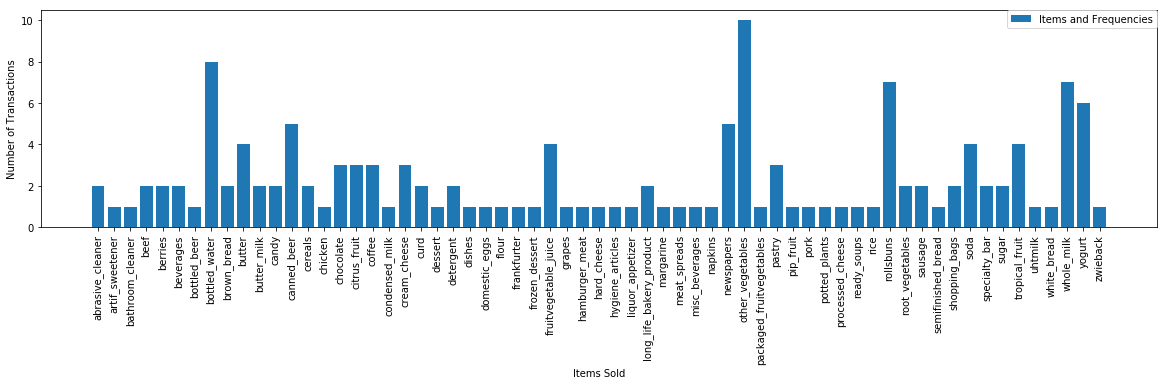

In [18]:
plt.bar(list(valu_counts.keys()), list(valu_counts.values()), label="Items and Frequencies")
plt.rcParams["figure.figsize"] = [20,5]
plt.ylabel ('Number of Transactions')
plt.xlabel ('Items Sold')
plt.xticks(list(valu_counts.keys()), rotation=90)
plt.legend (bbox_to_anchor=(1, 1), loc="best", borderaxespad=0.)

plt.show()

## Modifying as vectors
Modifying the `modified_df` into the apriori required format

In [23]:
# preparing data for the vectorizer
# combining each row into a string separated by space and ignoring None values
df_to_list = modified_df.values.tolist()
doc = []
for sublist in df_to_list:
    cleaned = [elem for elem in sublist if elem is not None]
    if len(cleaned):  
        doc.append(cleaned)
doc = [" ".join(x) for x in doc]
print(doc)

['citrus_fruit margarine ready_soups semifinished_bread', 'coffee tropical_fruit yogurt', 'whole_milk', 'cream_cheese meat_spreads pip_fruit yogurt', 'condensed_milk long_life_bakery_product other_vegetables whole_milk', 'abrasive_cleaner butter rice whole_milk yogurt', 'rollsbuns', 'bottled_beer liquor_appetizer other_vegetables rollsbuns uhtmilk', 'potted_plants', 'cereals whole_milk', 'bottled_water chocolate other_vegetables tropical_fruit white_bread', 'bottled_water butter citrus_fruit curd dishes', 'beef', 'frankfurter rollsbuns soda', 'chicken tropical_fruit', 'butter fruitvegetable_juice newspapers sugar', 'fruitvegetable_juice', 'packaged_fruitvegetables', 'chocolate', 'specialty_bar', 'other_vegetables', 'butter_milk pastry', 'whole_milk', 'cream_cheese detergent newspapers processed_cheese tropical_fruit', 'bathroom_cleaner candy flour frozen_dessert other_vegetables', 'bottled_water canned_beer', 'yogurt', 'chocolate rollsbuns sausage soda', 'other_vegetables', 'brown_brea

In [24]:
# initialising a vectoriser 
vectorizer = CountVectorizer()
# Converting our item_set into a bag of words sparse matrix
X = vectorizer.fit_transform(doc)
X = X.toarray()
# X has a shape of 50 rows = number_of_persons and 44 columns=len(item_set)
print(X.shape)
X

(50, 63)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
# printing the feature names of the vectorizer
print(len(vectorizer.get_feature_names()))
vectorizer.get_feature_names()[:10]

63


['abrasive_cleaner',
 'artif_sweetener',
 'bathroom_cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled_beer',
 'bottled_water',
 'brown_bread',
 'butter']

## Transforming our dataset for Apriori Algorithm

In [26]:
# creating a new dataframe and adding all the values of the sparse matrix to the corresponding item name
final_df = pd.DataFrame(X, columns = item_set)

In [27]:
# printing the first 5 rows
print(final_df.shape)
final_df.head()

(50, 63)


,abrasive_cleaner,artif_sweetener,bathroom_cleaner,beef,berries,beverages,bottled_beer,bottled_water,brown_bread,butter,...,shopping_bags,soda,specialty_bar,sugar,tropical_fruit,uhtmilk,white_bread,whole_milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# printing the last 5 rows
final_df.tail()

,abrasive_cleaner,artif_sweetener,bathroom_cleaner,beef,berries,beverages,bottled_beer,bottled_water,brown_bread,butter,...,shopping_bags,soda,specialty_bar,sugar,tropical_fruit,uhtmilk,white_bread,whole_milk,yogurt,zwieback
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Storing the transformed dataframe into `.csv` format

In [29]:
# storing the result into a csv file
final_df.to_csv('Groceries_Transformed.csv')

In [30]:
# Converting this jupyter ipynb to a html viewable file
# !jupyter nbconvert --to html Apriori.ipynb 

## Performing Apriori Algorithm

In [31]:
# finding the frequent item_sets above the minimum supports
frequent_itemsets = apriori(final_df,min_support=0.03,  use_colnames=True)
# first five rows
frequent_itemsets.head(5)

,support,itemsets
0,0.04,(abrasive_cleaner)
1,0.04,(beef)
2,0.04,(berries)
3,0.04,(beverages)
4,0.16,(bottled_water)


In [32]:
# last five rows
frequent_itemsets.tail(5)

,support,itemsets
43,0.04,"(root_vegetables, whole_milk)"
44,0.04,"(sausage, soda)"
45,0.04,"(curd, butter, bottled_water)"
46,0.04,"(root_vegetables, whole_milk, other_vegetables)"
47,0.04,"(rollsbuns, sausage, soda)"


In [33]:
# printing out the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(len(rules))
rules.head()

44


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled_water),(butter),0.16,0.08,0.04,0.25,3.125,0.0272,1.226667
1,(butter),(bottled_water),0.08,0.16,0.04,0.50,3.125,0.0272,1.680000
2,(curd),(bottled_water),0.04,0.16,0.04,1.00,6.250,0.0336,inf
3,(bottled_water),(curd),0.16,0.04,0.04,0.25,6.250,0.0336,1.280000
4,(bottled_water),(other_vegetables),0.16,0.20,0.04,0.25,1.250,0.0080,1.066667


In [34]:
## Trial Area

In [35]:
# valu_counts.keys()

In [36]:
# print(vectorizer.vocabulary_)

In [37]:
# re.sub(pattern="\W+", repl="", string="helo/world")

In [38]:
# for person in range(len(modified_df)):
#     for x in modified_df[person]:
#         if x in final_df.columns:
#             final_df[x][person] = 1
#         else:
#             final_df[x][person] = 0

In [39]:
# for person in range(len(modified_df)):
#     for item in modified_df[person]:
#         final_df[item][person] = 1
# print(final_df)

In [40]:
# valu_counts.values()

In [41]:
# valu_counts = dict()
# for x in item_set:
#     valu_counts[x] = item_list.count(x)
# print(valu_counts)

In [42]:
# item_list = set(df['Item 1'])

In [43]:
# item_set = set()
# for col in df.columns[1:]:
#     item_set = item_set.union(set(df[col]))
# item_set

In [44]:
# len(item_list)

In [45]:
# len(item_set)

In [46]:
# item_list

In [47]:
# item_list = list()
# for col in df.columns[1:]:
#     item_list = item_list + [str(x) for x in list(df[col]) if x!='NaN']
# item_list

In [48]:
# association_rules = apriori(X, min_support=0.0045, min_length = 2)
# association_results = list(association_rules)